In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

def upwind(): 

############### Space and Time discretization
 #n = 500
 #Phi = np.zeros(n)
 #delta_Phi = 3.45/(n-1)  
 #Phi[0] = -1.74
 #for i in range(1,n):
  # Phi[i] = Phi[i-1] + delta_Phi
 #print(Phi)

 n = 500
 Phi = np.zeros(n)    # tf = 2
# delta_Phi = 2.45/(n-1)
 #Phi[0] = -1.225

 delta_Phi = 10/(n-1)
 Phi[0] = -5
 for i in range(1,n):
  Phi[i] = Phi[i-1] + delta_Phi
 #print(Phi)


 m = 500
 T = np.zeros(m)
 delta_t = 2/(m-1)
 T[0] = 0
 for i in range(1,m):
  T[i] = T[i-1] + delta_t
 #print(T)

############# Getting D_Phi(i) = abs(Phi(i) - x_f)^2 
 xf = 0
 D_Phi = np.zeros(n+2)
 D_Phi[0] = abs(Phi[0]-delta_Phi - xf)**2
 D_Phi[n+1] = abs(Phi[n-1]+delta_Phi - xf)**2
 for i in range(1,n+1):
  D_Phi[i] = abs(Phi[i-1] -xf)**2
 #print(D_Phi)


############# Getting f^\ast and Z^\ast
# f^\ast = b(Phi) + \sigma(Phi)Z^\ast = Phi[i] - Phi[i]**3 + Z^\ast
# Z^\ast  =  -V_Phi(t,Phi) --> 
# Z*[i,j] = -V_Phi(j, Phi[i]) 
        # = { -(V[i,j]-V[i-1,j])/delta_Phi if f^\ast > 0; -(V[i+1,j]-V[i,j])/delta_Phi if f^\ast < 0} upwind scheme
        # = { -(D(Phi[i]) - D(Phi[i-1]))/delta_Phi if f^\ast > 0; -(D(Phi[i+1]) - D(Phi[i]))/delta_Phi if f^\ast < 0} 
 f_ast = np.zeros(n)
 Z = np.zeros(n)
 for i in range(0,n):
    if (Phi[i]-Phi[i]**3 + (D_Phi[i]-D_Phi[i-1])/delta_Phi)>0:
       Z[i] =  -(D_Phi[i]-D_Phi[i-1])/delta_Phi
    elif (Phi[i]-Phi[i]**3 + (D_Phi[i+1]-D_Phi[i])/delta_Phi)<0: 
       Z[i] =  -(D_Phi[i]-D_Phi[i-1])/delta_Phi
    f_ast[i] = Phi[i] - Phi[i]**3 + Z[i]
#print(f_ast)
#print(Z)

########## Get the matrix A
 A = np.zeros((n,n))
 for i in range(0,n-1):
   A[i,i] = 1 - (delta_t/delta_Phi)*(max(f_ast[i],0)-min(f_ast[i],0))
   A[i,i+1] = -(delta_t/delta_Phi)*min(f_ast[i],0)
   A[i+1,i] = (delta_t/delta_Phi)*max(f_ast[i],0)

#print(A)


############# Getting the initial values: V_tm  and  b_tm
### Get the vector b_tm
 b = np.zeros(n)
 for i in range(0,n): 
   b[i] = -(0.5*delta_t)*Z[i]**2
#print(b)

### Get V_tm
 V = np.zeros(n)
 for i in range(0,n): 
   V[i] = abs(Phi[i]-xf)**2
#print(V)

############## Backward iteration
 while(m>0): 
   V = A*V + b
   m-= 1

 Z_ast = -V[m-1]
############# Plot the optimal control Z^\ast
 #plt.figure(figsize=(10,8))
# plt.plot(T[1:n], Z_ast[1:n],label='Z*(t)')
 #plt.xlabel('time (t)')
 #plt.ylabel('Z*(t)')
 #plt.show()

 plt.figure(figsize=(10,8))
 Phi_ast =np.zeros(n)
 Phi_ast[0] = -1
 for i in range(1,n):
  Phi_ast[i] = Phi_ast[i-1] + (Phi_ast[i] - Phi_ast[i]**3 + Z_ast[i]
 plt.plot(T, Phi_ast,label='Phi(t)')
 plt.xlabel('time (t)')
 plt.ylabel('Phi*(t)')
 plt.show()



############################## Please, check if the boundary condition defined below is correct. 

  ############## We define the boundary conditions and Compute Z_ast
# V_bar = np.zeros(n+2)
 #V_bar[0] = 0    # boundary
 #V_bar[n+1] = 0  # boundary
 #V_bar[1:n+1] = V[m] # the previous V computed backward in time
 #Z_ast = np.zeros(n)

############# Compute and Plot the optimal control Z^\ast
 #for i in range(0,n):
  #if (Phi[i]-Phi[i]**3 + ((V_bar[i+1] -V_bar[i])/delta_Phi)>0):
   #    Z_ast[i] =  -(V_bar[i+1] -V_bar[i])/delta_Phi
  #elif (Phi[i]-Phi[i]**3 + (V_bar[i] -V_bar[i-1])/delta_Phi)<0: 
   #    Z_ast[i] =  -(V_bar[i] -V_bar[i-1])/delta_Phi
 #plt.figure(figsize=(10,8))
 #plt.plot(T, Z_ast,label='Z*(t)')
 #plt.xlabel('time (t)')
 #plt.ylabel('Z*(t)')
 #plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: RuntimeWarning: overflow encountered in multiply


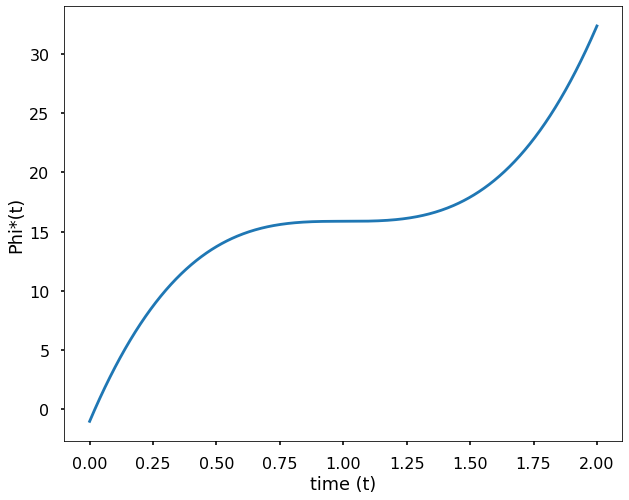

In [ ]:
upwind() 
